In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

In [2]:
pat_df = pd.read_excel('sheetdata/United data.xlsx', sheet_name='baskakova', header=[0, 1, 2])
pat_df.head()

right                                                            \
        hip                knee                   ankle                 
          x     y app         x         y app         x         y app   
0  0.004684  1.50 NaN  0.017456  1.001898 NaN  0.009828 -0.771657 NaN   
1  0.014396  2.25 NaN  0.024938  2.509450 NaN  0.024570 -0.767853 NaN   
2  0.026720  2.00 NaN  0.032419  4.268574 NaN  0.044226 -0.504716 NaN   
3  0.039158  1.00 NaN  0.047382  5.271099 NaN  0.063882  0.274550 NaN   
4  0.051635 -0.25 NaN  0.059850  6.274251 NaN  0.081081  0.537053 NaN   

       left                                                                
        hip                    knee                   ankle                
          x         y app         x         y app         x         y app  
0  0.009524  0.470588 NaN  0.007211  0.248197 NaN  0.004717 -0.751179 NaN  
1  0.030952 -0.235294 NaN  0.014521  1.996370 NaN  0.018868 -0.504717 NaN  
2  0.050000 -1.176471 NaN  0.021816  3.494546 NaN  0.025943 -0.006486 NaN  
3  0.066667 -1.647059 NaN  0.026712  4.993322 NaN  0.037736  0.990566 NaN  
4  0.085714 -2.352941 NaN  0.031608  6.492098 NaN  0.051887  1.487028 NaN

In [5]:
rkx = pat_df['right']['knee']['x'].dropna().values
rky = pat_df['right']['knee']['y'].dropna().values
rky[-1] = rky[0]
rhx = pat_df['right']['hip']['x'].dropna().values
rhy = pat_df['right']['hip']['y'].dropna().values
lkx = pat_df['left']['knee']['x'].dropna().values
lky = pat_df['left']['knee']['y'].dropna().values
lhx = pat_df['left']['hip']['x'].dropna().values
lhy = pat_df['left']['hip']['y'].dropna().values

t = np.linspace(0, 1, num=80)

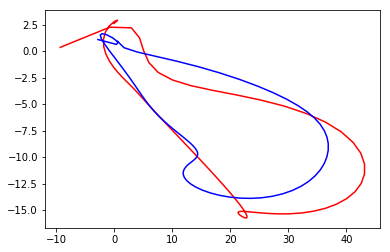

In [6]:
# поправить "хвосты" у графиков
r_knee = np.poly1d(np.polyfit(rkx, rky, deg=12))(t)
r_hip = np.poly1d(np.polyfit(rhx, rhy, deg=12))(t)
l_knee = np.poly1d(np.polyfit(lkx, lky, deg=12))(t)
l_hip = np.poly1d(np.polyfit(lhx, lhy, deg=12))(t)


plt.plot(r_knee, r_hip, 'r', l_knee, l_hip, 'b')

In [7]:
from scipy.spatial import procrustes as proc

In [22]:
r_knee.shape

(80,)

In [23]:
np.array([r_knee, r_hip]).shape

(2, 80)

In [26]:
np.array([r_knee, r_hip]).T.shape

(80, 2)

In [27]:
right_standard, left_matched, disparity = proc(np.array([r_knee, r_hip]).T, np.array([l_knee, l_hip]).T)


print('Procrustes result: ', proc_result[0].shape)

Procrustes result:  (2, 80)


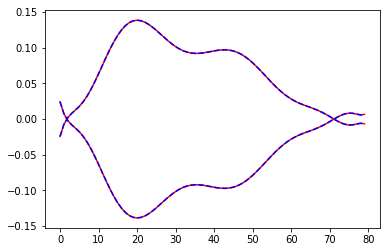

In [28]:
right_standard = proc_result[0].T
left_matched = proc_result[1].T


plt.plot(right_standard, 'r', left_matched, '--b')


In [20]:
print('disparity: ', disparity)

disparity:  1.306465527798833e-28
